In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Social_Network_Ads.csv")

In [3]:
data = data.iloc[: , 2:]

In [4]:
data.head(3)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0


In [5]:
data.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
ss = StandardScaler()
data["EstimatedSalary"]=ss.fit_transform(data[["EstimatedSalary"]])

In [8]:
data.head(3)

,Age,EstimatedSalary,Purchased
0,19,-1.490046,0
1,35,-1.460681,0
2,26,-0.785290,0


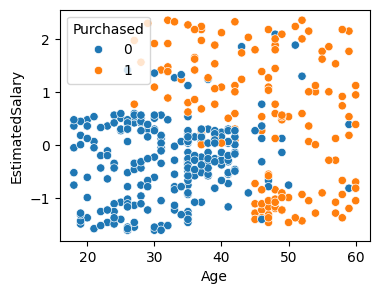

In [9]:
plt.figure(figsize=(4,3))
sns.scatterplot(x="Age" , y = "EstimatedSalary" , data = data , hue="Purchased")
plt.show() #Data is not linearly saperable so here we can use decision tree non linear algorithm

In [10]:
x = data.iloc[: , :-1]
y = data["Purchased"]

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2 , random_state=42)

In [13]:
from sklearn.tree import DecisionTreeClassifier

In [14]:
dt = DecisionTreeClassifier() #Gini method
dt.fit(x_train , y_train)

DecisionTreeClassifier()

In [15]:
dt.score(x_train , y_train)*100 , dt.score(x_test , y_test)*100  #bad accuracy

(99.6875, 83.75)

In [16]:
from sklearn.tree import plot_tree

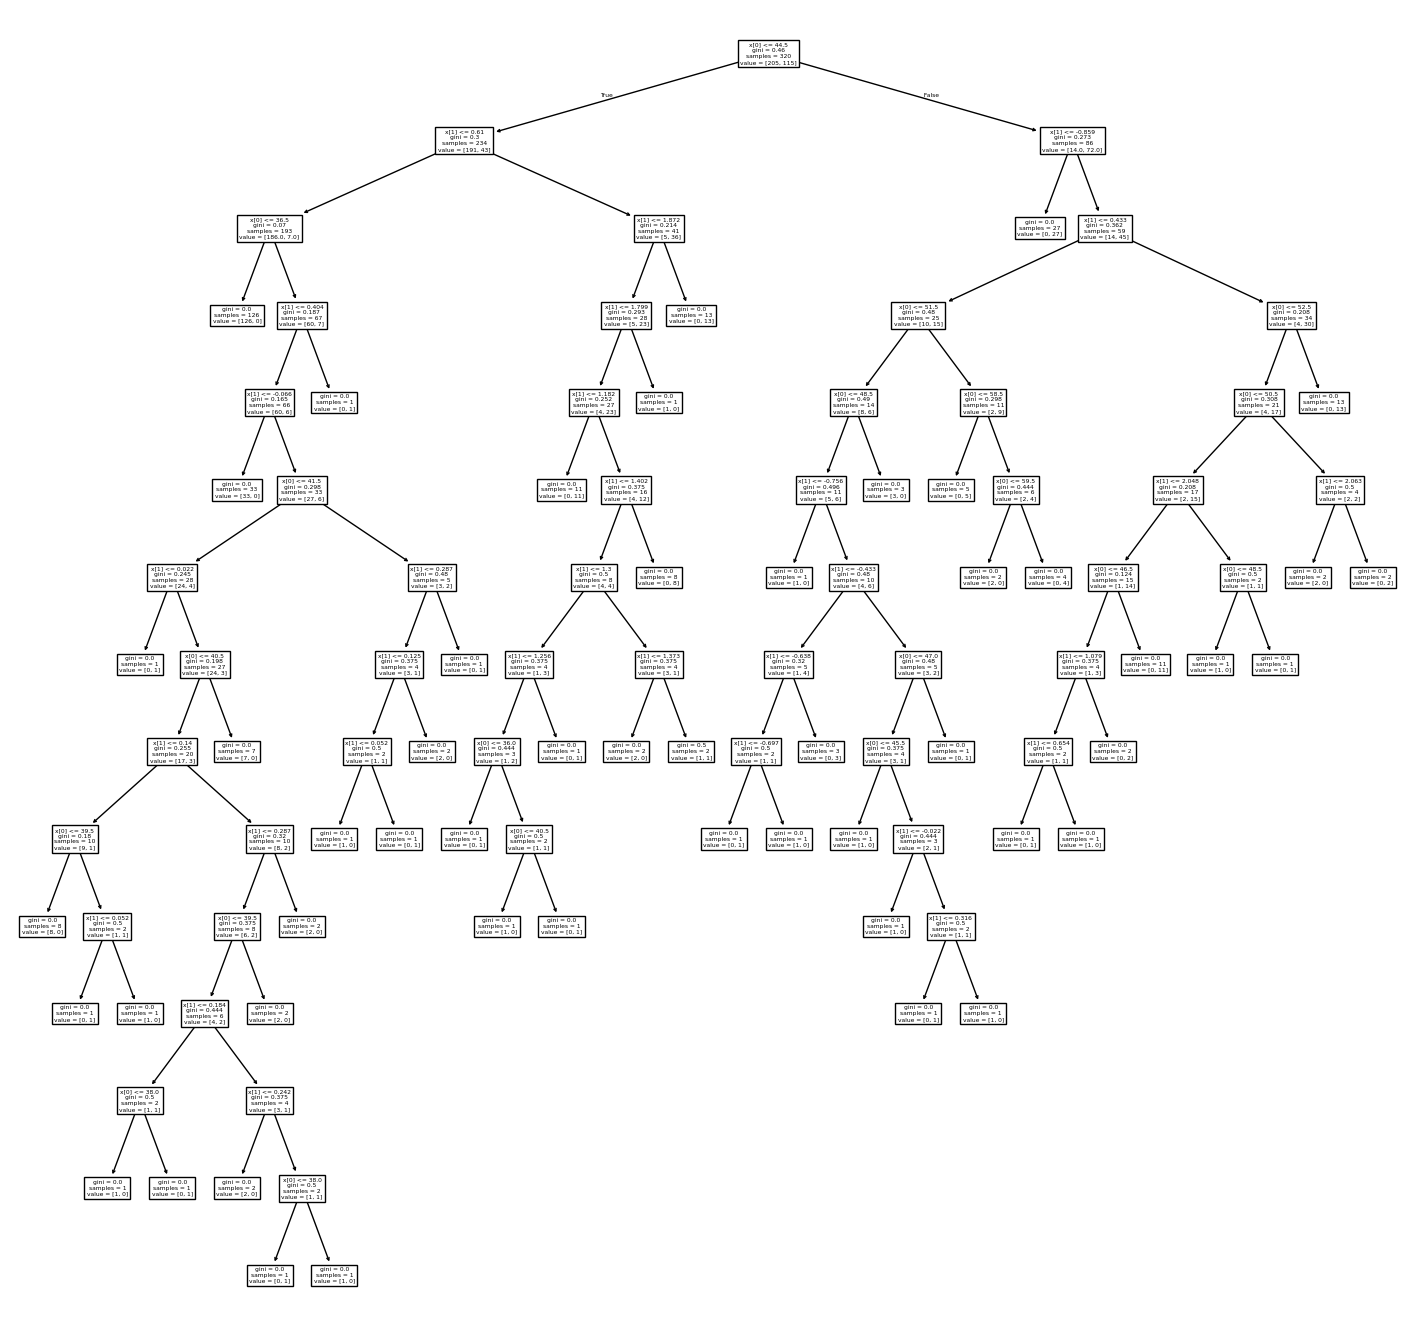

In [17]:
plt.figure(figsize=(18,17))
plot_tree(dt)
plt.show()

In [18]:
dt1 = DecisionTreeClassifier(criterion = "entropy") #Entropy method
dt1.fit(x_train , y_train)

DecisionTreeClassifier(criterion='entropy')

In [20]:
dt1.score(x_train , y_train)*100 , dt1.score(x_test , y_test)*100  #bad accuracy

(99.6875, 83.75)

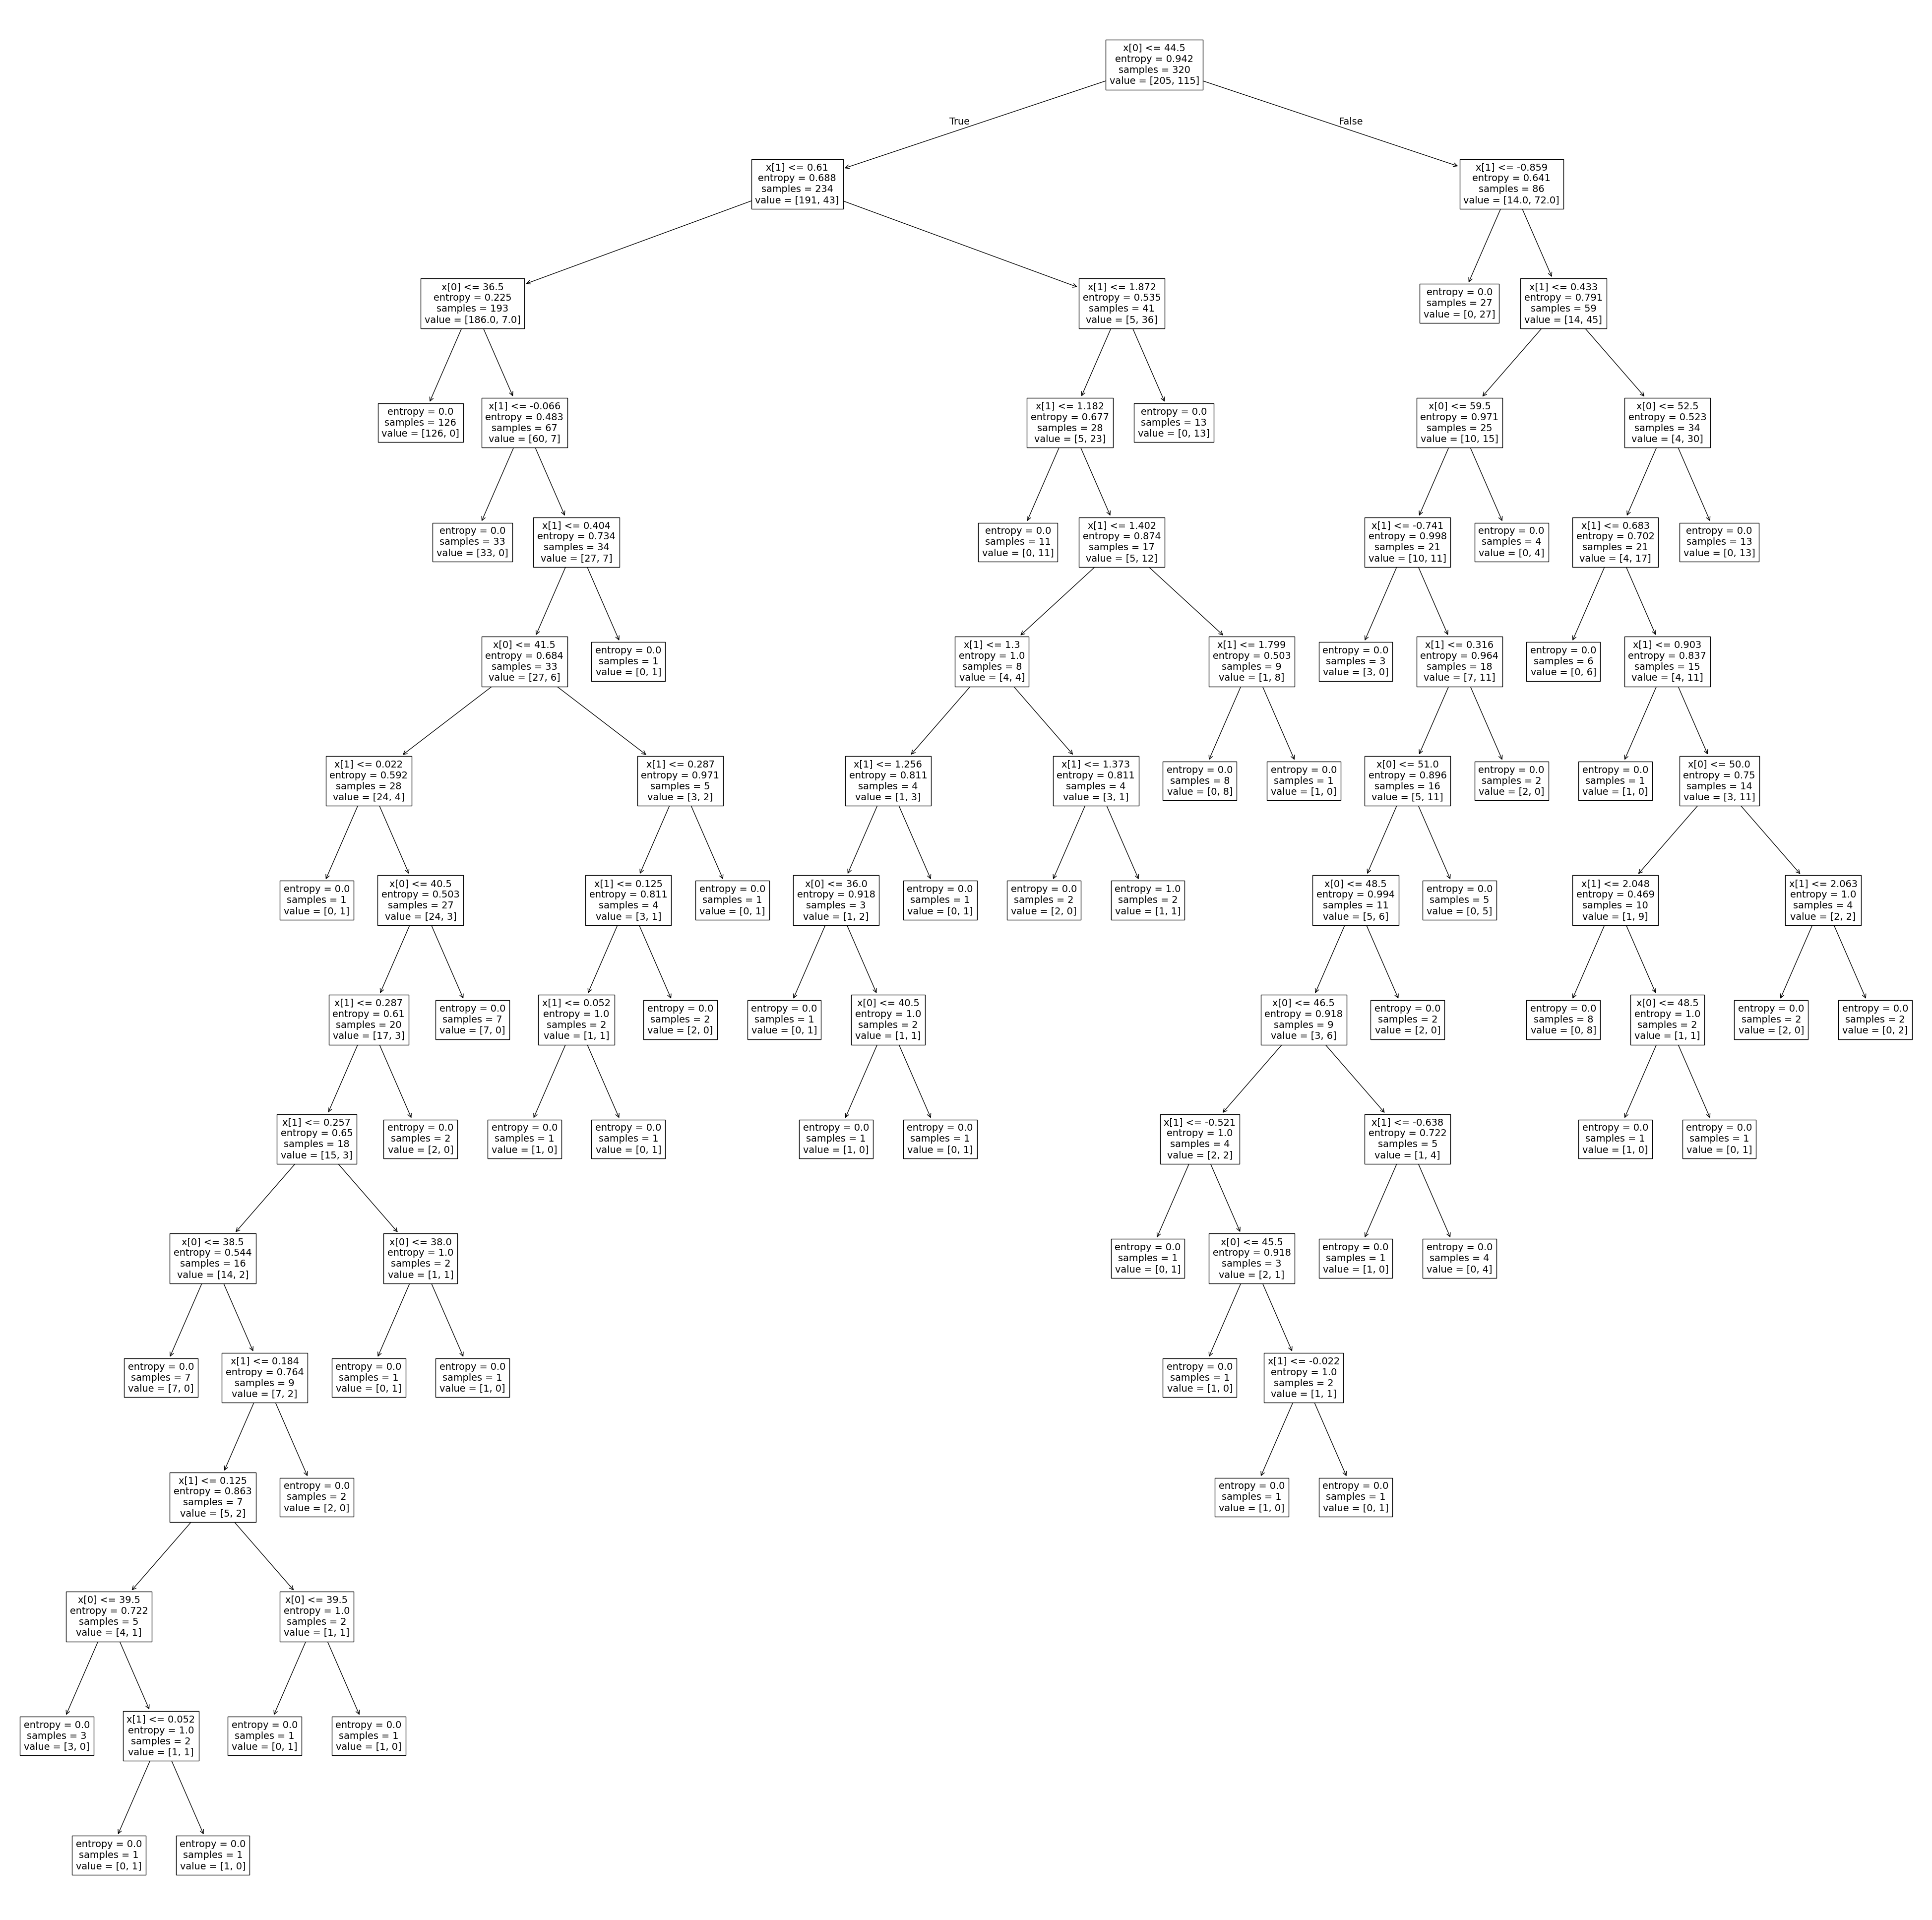

In [22]:
plt.figure(figsize = (50, 50))
plot_tree(dt1)
plt.savefig("entopy")
plt.show()